# Clustering con Python

### Importar el dataset

In [2]:
import pandas as pd

In [3]:
mainpath = "C:/Users/dguai/Documents/Courses/Machine Learning Data Science en Python/Practicas/Repositorios/Datasets"
df = pd.read_csv(mainpath + "/" + "Wine/winequality-red.csv", sep = ";")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

In [6]:
import matplotlib.pyplot as plt

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

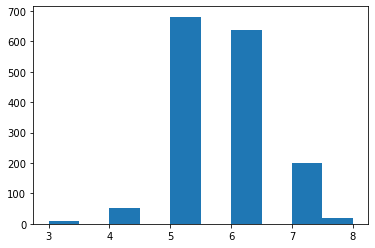

In [7]:
plt.hist(df["quality"])

In [8]:
df.groupby("quality").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### Normalización de los datos

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


## Clustering jerárquico con scikit-learn

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [12]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

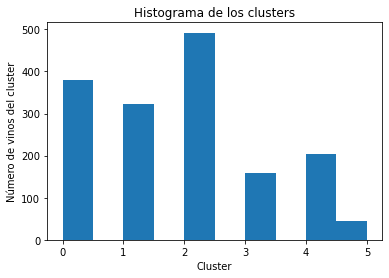

In [13]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [14]:
clus.children_

array([[   0,    4],
       [ 135,  140],
       [ 750,  751],
       ...,
       [3179, 3191],
       [3192, 3193],
       [3194, 3195]], dtype=int32)

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Z = linkage(df_norm, "ward")

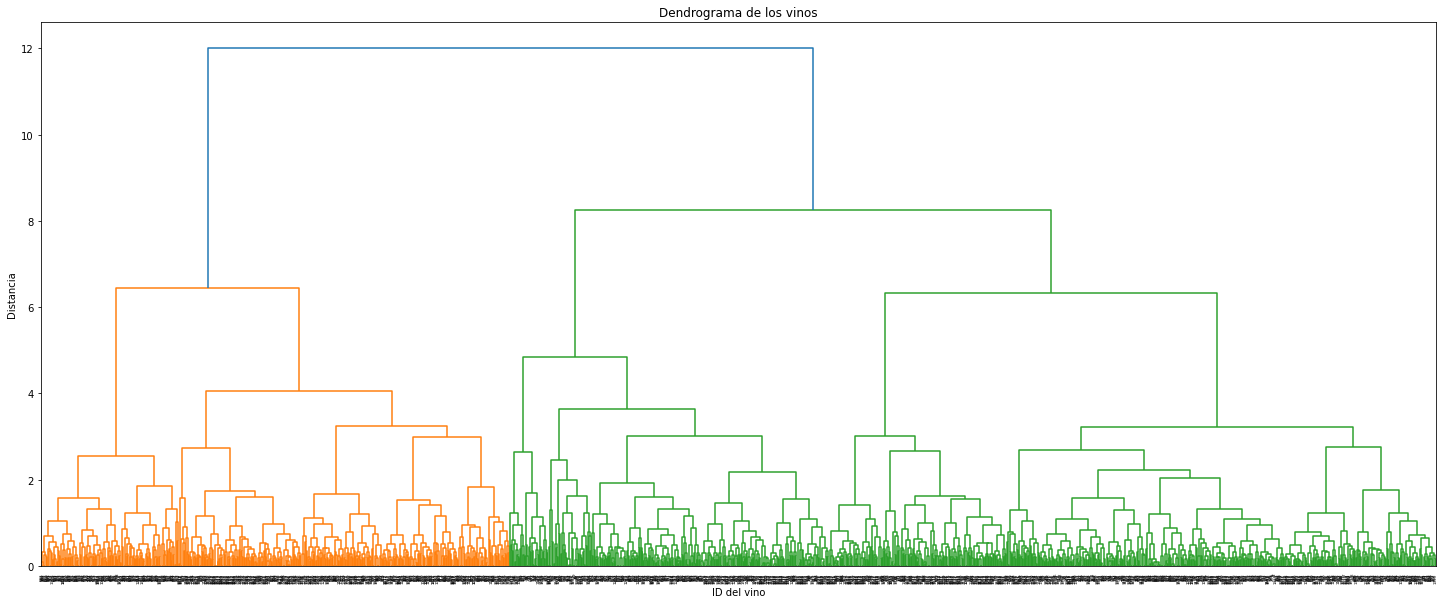

In [19]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

### K-means

In [20]:
from sklearn.cluster import KMeans
from sklearn import datasets

In [21]:
model = KMeans(n_clusters = 6)
model.fit(df_norm)

KMeans(n_clusters=6)

In [22]:
model.labels_

array([2, 2, 2, ..., 5, 5, 4])

In [23]:
md_k = pd.Series(model.labels_)

In [24]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [25]:
df_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h,clust_k
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4,2,2
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4,2,2
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6,3,1
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4,2,2


(array([ 28.,   0., 256.,   0., 518.,   0., 316.,   0., 261., 220.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

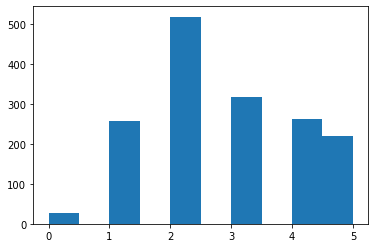

In [26]:
plt.hist(md_k)

In [27]:
model.cluster_centers_

array([[0.33249052, 0.28522505, 0.49785714, 0.07265166, 0.55008347,
        0.21780684, 0.21794548, 0.51305853, 0.23003375, 0.60179641,
        0.15549451, 0.46428571],
       [0.5762583 , 0.2030046 , 0.50519531, 0.1294146 , 0.13063439,
        0.13352773, 0.08955389, 0.65162674, 0.33559916, 0.22492515,
        0.28886218, 0.54609375],
       [0.26275327, 0.35707013, 0.12140927, 0.09146745, 0.12339098,
        0.14512752, 0.10649822, 0.48950555, 0.48698811, 0.15550366,
        0.22366597, 0.44285714],
       [0.31799597, 0.27997659, 0.30392405, 0.15233224, 0.12705247,
        0.3784097 , 0.29677506, 0.54096266, 0.43528855, 0.17839006,
        0.21181435, 0.45253165],
       [0.36340827, 0.1609589 , 0.42471264, 0.10769957, 0.10567421,
        0.16842048, 0.08674167, 0.41132322, 0.41871059, 0.23692844,
        0.49077513, 0.70038314],
       [0.17304907, 0.32384807, 0.092     , 0.09405355, 0.0952876 ,
        0.25457746, 0.12743334, 0.32182953, 0.58006442, 0.18639085,
        0.4930303 ,

In [28]:
model.inertia_

186.5833843362816

### Interpretación final

In [29]:
df_norm.groupby("clust_k").mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_h
clust_k,,,,,,,,,,,,,
0,0.332491,0.285225,0.497857,0.072652,0.550083,0.217807,0.217945,0.513059,0.230034,0.601796,0.155495,0.464286,5.000000
1,0.576258,0.203005,0.505195,0.129415,0.130634,0.133528,0.089554,0.651627,0.335599,0.224925,0.288862,0.546094,1.992188
2,0.262753,0.357070,0.121409,0.091467,0.123391,0.145128,0.106498,0.489506,0.486988,0.155504,0.223666,0.442857,2.009653
3,0.317996,0.279977,0.303924,0.152332,0.127052,0.378410,0.296775,0.540963,0.435289,0.178390,0.211814,0.452532,1.056962
4,0.363408,0.160959,0.424713,0.107700,0.105674,0.168420,0.086742,0.411323,0.418711,0.236928,0.490775,0.700383,0.118774
5,0.173049,0.323848,0.092000,0.094054,0.095288,0.254577,0.127433,0.321830,0.580064,0.186391,0.493030,0.613636,3.454545
